https://zh.wikipedia.org/wiki/%E5%82%85%E9%87%8C%E5%8F%B6%E5%8F%98%E6%8D%A2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
def sin_(freq, t=1, phase=0): # sin(頻率, x, 相位)
    return np.sin(t * freq * 2 * np.pi + phase)

def cos_(freq, t=1, phase=0): # cos(頻率, x, 相位)
    return np.cos(t * freq * 2 * np.pi + phase)

# Fourier Transform (需要函數密度高, 才能假裝積分) 轉換完會差兩倍 不知道為啥
def euler_(freq ,x): # Euler: e^ix = cos(x) + i*sin(x)
    return np.exp(-2j * np.pi * freq * x)

def Fourier_Transform_(func, f ,t): # 模擬積分
    return (func * euler_(freq=f[:,np.newaxis], x=t)).sum(1)*t[1] # *t[1] 積分

def Inver_Fourier_Transform_(func, f ,t): # 模擬積分
    return  (func * euler_(freq=-f, x=t[:,np.newaxis])).sum(1)*f[1] # *f[1] 積分

# Discrete Fourier Transform (差在有沒有積分項)
def Dis_euler_(n ,k): # x.size = N(離散項數)
    return np.exp(-2j * np.pi * n * k / k.size)

def Dis_Fourier_Transform_(func):
    n = k = np.arange(func.size)
    return (func * Dis_euler_(n, k[:,np.newaxis])).sum(1)

def Dis_Inver_Fourier_Transform_(func):
    n = k = np.arange(func.size)
    return  ((func / func.size) * Dis_euler_(-n[:,np.newaxis], k)).sum(1)
            

### Fourier Series (傅立葉級數)
https://en.wikipedia.org/wiki/Fourier_series                              
https://zh.wikipedia.org/wiki/%E5%82%85%E9%87%8C%E5%8F%B6%E7%BA%A7%E6%95%B0

Fourier Series:
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/9b2dce7ad9c0591419b637aee8cdb8c4a9fd9e5a)
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/2f7e5be189e79d0b56c8031ee50c4b2084e34446)

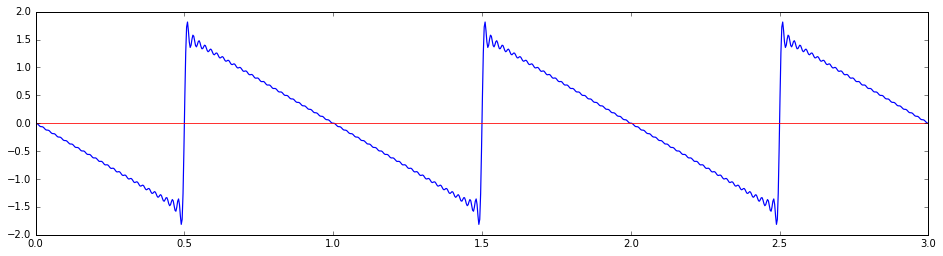

In [3]:
x1 = np.linspace(0, 3, 1000)

func1 = 0
for i in range(1, 51):
    if i % 2 == 0:
        func1 += (sin_(freq=i, t=x1)/i)
    else:
        func1 -= (sin_(freq=i, t=x1)/i)

plt.figure(figsize=(16, 4))
plt.plot(x1, func1, linewidth=1.2)
plt.plot(x1, np.zeros_like(func1), 'r', linewidth=0.8)

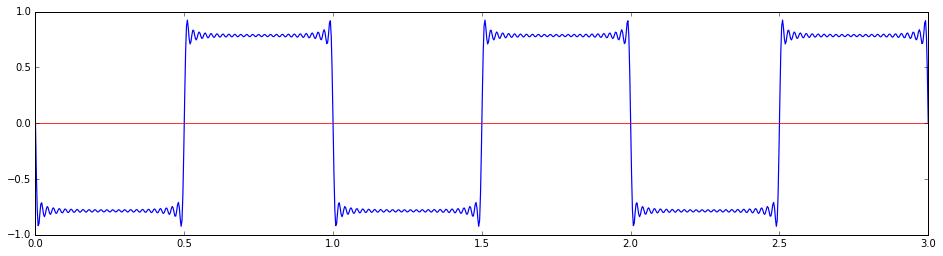

In [4]:
func2 = 0
for i in range(1, 51):
    if i % 2 == 1:
        func2 -= (sin_(freq=i, t=x1)/i)
    else:
        pass

plt.figure(figsize=(16, 4))
plt.plot(x1, func2, linewidth=1.2)
plt.plot(x1, np.zeros_like(func2), 'r', linewidth=0.8)

### Fourier transform & Discrete Fourier transform

https://en.wikipedia.org/wiki/Fourier_transform                    
https://zh.wikipedia.org/wiki/%E5%82%85%E9%87%8C%E5%8F%B6%E5%8F%98%E6%8D%A2

Fourier Transform:
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/97ad0938a279c4846d42a4bbd212f6a1f0ca4c0f)

Inverse Fourier Transform:
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/0d2aab0c0d32f0438d2ccf5bf779458053ba2bd9)

https://en.wikipedia.org/wiki/Discrete_Fourier_transform
https://zh.wikipedia.org/wiki/%E7%A6%BB%E6%95%A3%E5%82%85%E9%87%8C%E5%8F%B6%E5%8F%98%E6%8D%A2

Discrete Fourier Transform:
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/526d8c9103309b720516b7ee79e79186b15c81e3)

Inverse Discrete Fourier Transform:
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/74d2a9e7f31ef1b808bfbc8d2355aff7703c2064)

### 產生一個隨機波(用n個隨機頻率的正(餘)弦波) 使用傅立葉轉換

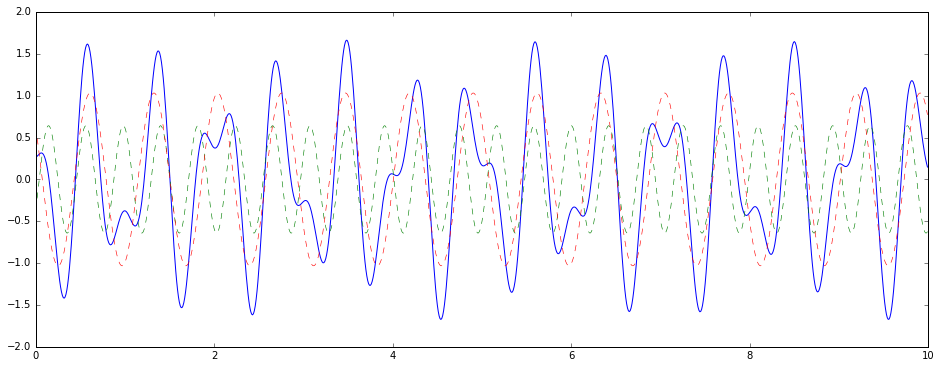

In [5]:
n = 2 #幾個隨機合成波

randf = np.random.uniform(low=1.2, high=2.5, size=[n]) # 頻率
randa = np.random.choice([-1, 1],size=[n]) * np.random.uniform(low=0.5, high=1.5, size=[n]) # 隨機正負*震幅
randp = np.random.uniform(high=np.pi*2, size=[n]) # 相位角

t = np.linspace(0, 10, 1000, endpoint=False) # 展開時間 位置 list

noise = np.random.normal(scale=1, size=t.shape) # 雜訊
func_dic = {} # 組成 funnc 的 func set
func = 0
for i in range(n):
    func_dic[i] = randa[i]*sin_(freq=randf[i], t=t, phase=randp[i]) # 震幅-randa * sin(頻率-randf, x, 相位-randp)
    func += func_dic[i]

func += 0.*noise # 加上雜訊
plt.figure(figsize=(16, 6))
plt.plot(t, func) # 合成的波
for i in range(n):
    plt.plot(t, func_dic[i], '--', linewidth=0.6) # 各別的波

In [6]:
print('頻率:', randf)
print('震幅:', randa)
print('相位:', randp/2/np.pi)

頻率: [2.39094465 1.39840891]
震幅: [-0.64208731  1.03256294]
相位: [0.40239896 0.39551123]


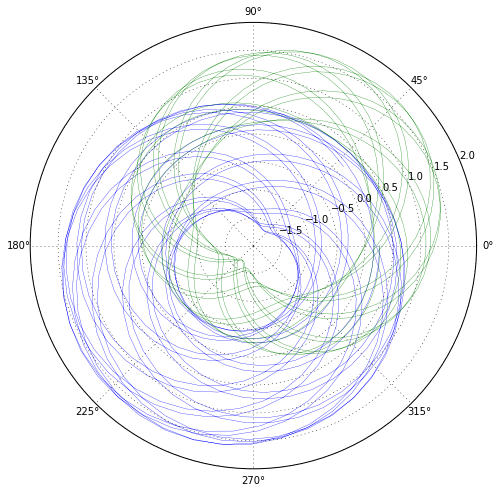

In [7]:
p = 1/randf[:, np.newaxis] # 幾秒繞一圈 (繞圈的週期)
s = (t*2*np.pi) / p
plt.figure(figsize=(8, 8))
for i in range(n): 
    plt.polar(-s[i], func, linewidth=0.3) #負號極座標順時針

### 纏繞於座標

### 利用Euler's formula(尤拉公式) 投影在XY座標

(-1.840643458531115, 1.840643458531115)

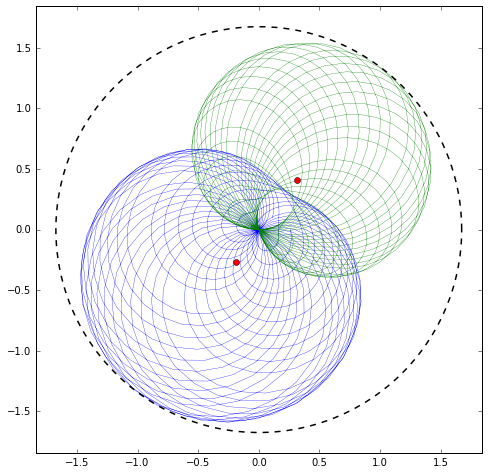

In [8]:
f = randf[:, np.newaxis]
func_xy = func * euler_(f, t)
oxy = np.linspace(0, 2*np.pi, 200) # 畫大圓
d = abs(func).max()  # 畫大圓
plt.figure(figsize=(8, 8))
for i in range(n):
    plt.plot(func_xy.real[i], func_xy.imag[i], '-', linewidth=0.3)
plt.plot(func_xy.real.mean(1), func_xy.imag.mean(1), 'or') # 質心
plt.plot(d*np.cos(oxy), d*np.sin(oxy), '--k', linewidth=1.5) # 畫大圓
plt.xlim(-(1.1*d), 1.1*d)
plt.ylim(-(1.1*d), 1.1*d)

### 質心移動軌跡

In [9]:
f = np.linspace(0, 6, 1000, endpoint=False) # 展開頻率 list
mass = (func * euler_(freq=f[:,np.newaxis], x=t)).mean(1)

(-1.840643458531115, 1.840643458531115)

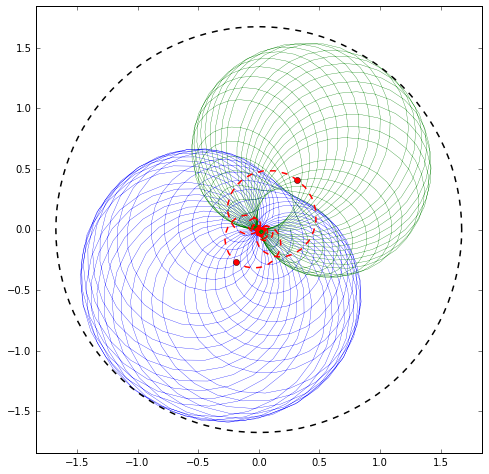

In [10]:
f = randf[:, np.newaxis]
func_xy = func * euler_(f, t)
oxy = np.linspace(0, 2*np.pi, 121) # 畫大圓
d = abs(func).max()  # 畫大圓
plt.figure(figsize=(8, 8))
for i in range(n):
    plt.plot(func_xy.real[i], func_xy.imag[i], '-', linewidth=0.3)
plt.plot(func_xy.real.mean(1), func_xy.imag.mean(1), 'or') # 質心
plt.plot(mass.real, mass.imag, '--r', linewidth=1.5) # 質心軌跡
plt.plot(d*np.cos(oxy), d*np.sin(oxy), '--k', linewidth=1.5) # 畫大圓
plt.xlim(-(1.1*d), 1.1*d)
plt.ylim(-(1.1*d), 1.1*d)

### Fourier Transform

In [11]:
f = np.linspace(0, 6, 1000, endpoint=False) # 展開頻率 list

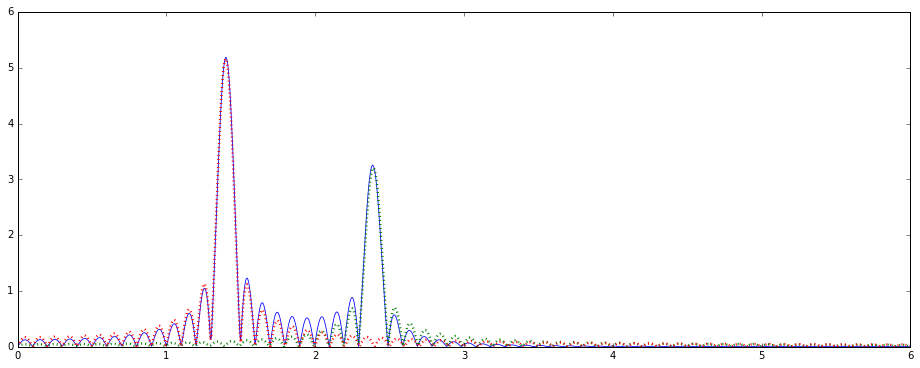

In [12]:
fft = Fourier_Transform_(func, f, t)
fft_dict = {}
for i in range(n):
    fft_dict[i] = Fourier_Transform_(func_dic[i], f, t)

plt.figure(figsize=(16, 6))
plt.plot(f, abs(fft), linewidth=0.8) # 復數取絕對值
#plt.plot(f, abs(mass), 'r') # mass與 Fourier Transform 波形與相同 只差積分係數
#plt.plot(f, fft.real)
#plt.plot(f, fft.imag)
for i in range(n):
    plt.plot(f, abs(fft_dict[i]), ':', linewidth=2.5) # 復數取絕對值

#### 最大震幅的頻率值

In [13]:
print('maxfreq:%0.3f'%f[np.abs(fft).argmax()])

maxfreq:1.398


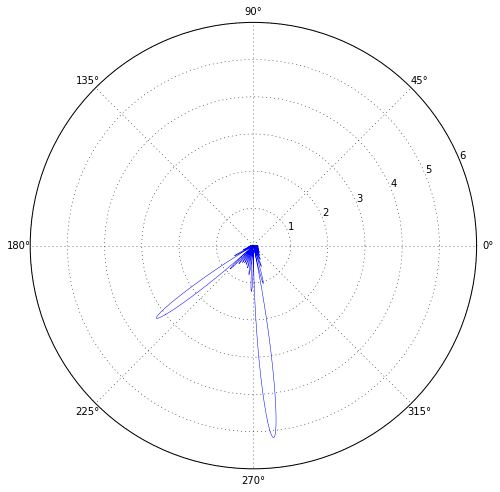

In [14]:
p = 6 # 幾秒繞一圈 (繞圈的週期)
s = (f*2*np.pi)/p
plt.figure(figsize=(8, 8))
plt.polar(-s, abs(fft), linewidth=0.5)

(-5.286610282083457, 5.286610282083457)

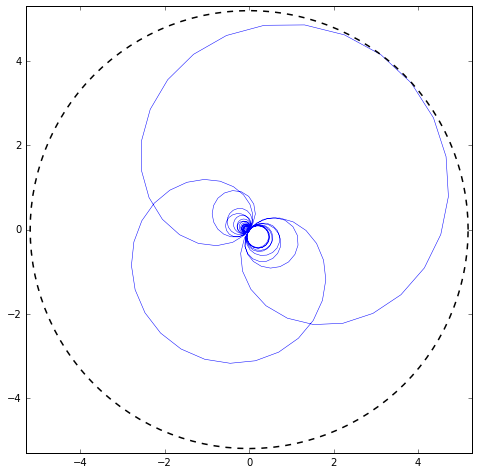

In [15]:
# 不知道意義?
plt.figure(figsize=(8, 8))
plt.plot(fft.real, fft.imag, '-', linewidth=0.5)
d = abs(fft).max()  # 畫大圓
plt.plot(d*np.cos(oxy), d*np.sin(oxy), '--k', linewidth=1.5) # 畫大圓
plt.xlim(-(d+0.1), d+0.1)
plt.ylim(-(d+0.1), d+0.1)

### Inverse Fourier Transform

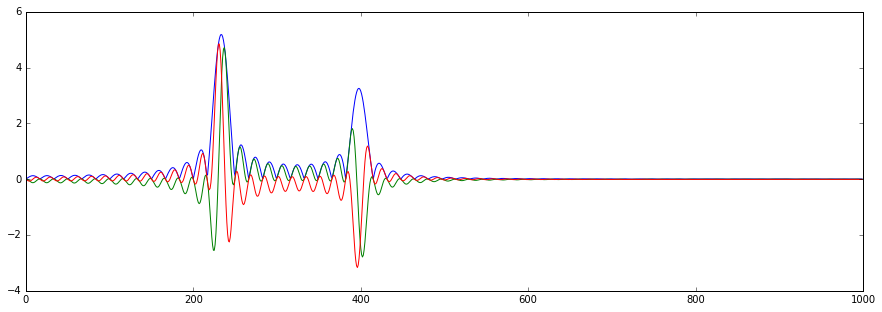

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(abs(fft))
plt.plot(fft.real)
plt.plot(fft.imag)


In [17]:
#invfft = (fft * euler_(freq=-f, x=t[:,np.newaxis])).sum(1)*f[1]  # *f[1] 積分
invfft = Inver_Fourier_Transform_(fft, f, t)

(-0.9545300953335609, 0.9545300953335609)

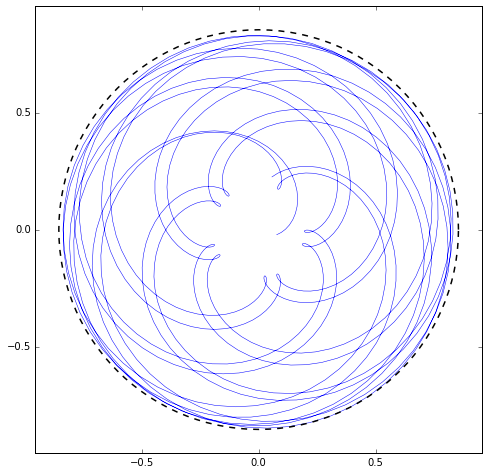

In [18]:
# 不知道意義?
d = abs(invfft).max() # 畫大圓
plt.figure(figsize=(8, 8))
plt.plot(invfft.real, invfft.imag, '-', linewidth=0.5)
plt.plot(d*np.cos(oxy), d*np.sin(oxy), '--k', linewidth=1.5) # 畫大圓
plt.xlim(-(d+0.1), d+0.1)
plt.ylim(-(d+0.1), d+0.1)

#### 還原圖像!

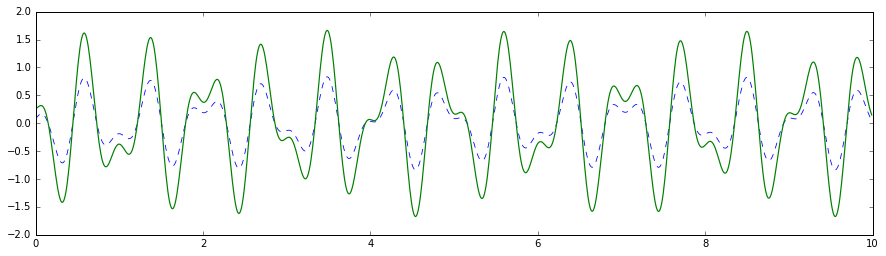

In [19]:
plt.figure(figsize=(15, 4))
plt.plot(t, invfft.real, '--', linewidth=0.8) # 留下實部 原本的1/2???
#plt.plot(t, invfft.imag, ':', linewidth=0.6)
plt.plot(t, func, linewidth=1.2)

In [20]:
print(np.allclose(func, invfft*2)) #貼近 還是有誤差
abs(func - (invfft.real*2)).mean()

False


0.0011801267197560912

In [21]:
# test!! 實部虛部都放進傅立葉 正逆轉換
fft2 = Fourier_Transform_(invfft, f, t)
invfft2 = Inver_Fourier_Transform_(fft2, f, t)

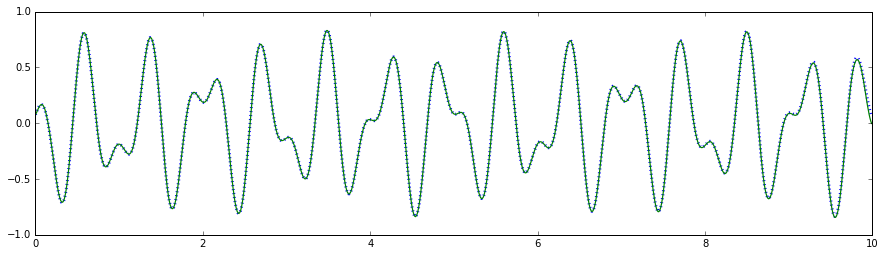

In [22]:
# 並沒有兩倍的問題  確定是一開始func 只有實部的原因!!
plt.figure(figsize=(15, 4))
plt.plot(t, invfft.real, ':b', linewidth=3)
plt.plot(t, invfft2.real, '-g', linewidth=1.2)

In [23]:
print(np.allclose(invfft, invfft2))
abs(invfft.real - (invfft2.real)).mean()

False


0.0027880912581827503

### Discrete Fourier transform 離散傅立葉變換 


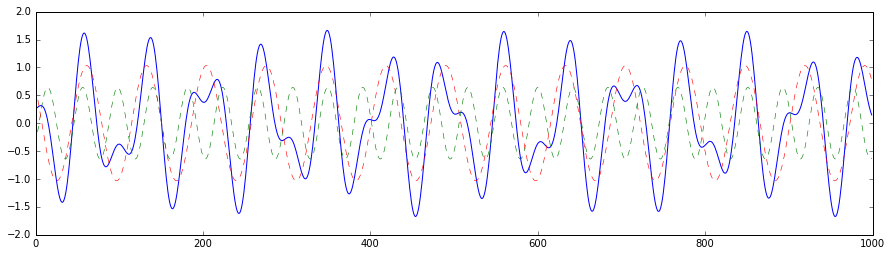

In [24]:
plt.figure(figsize=(15, 4))
plt.plot(func)
for i in range(n):
    plt.plot(func_dic[i], '--', linewidth=0.6)

In [25]:
dft = Dis_Fourier_Transform_(func)
invdft = Dis_Inver_Fourier_Transform_(dft)

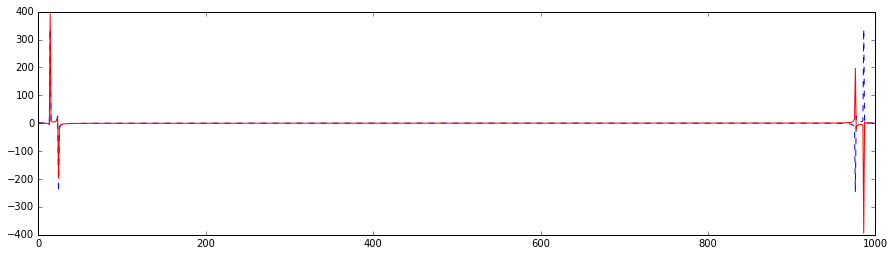

In [26]:
plt.figure(figsize=(15, 4))
plt.plot(dft.real, '--') # 偶函數
plt.plot(dft.imag, 'r') # 奇函數

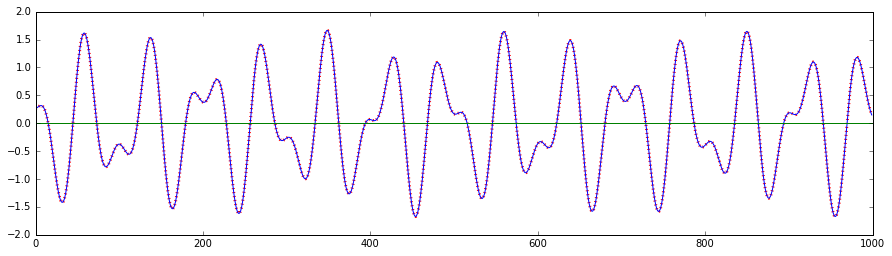

In [27]:
plt.figure(figsize=(15, 4))
plt.plot(func, ':r', linewidth=3)
plt.plot(invdft.real)
plt.plot(invdft.imag)

### Numpy 的 Fourier Transform 套件 np.fft

In [28]:
npfft = np.fft.fft(func) # shape 和 func 相同

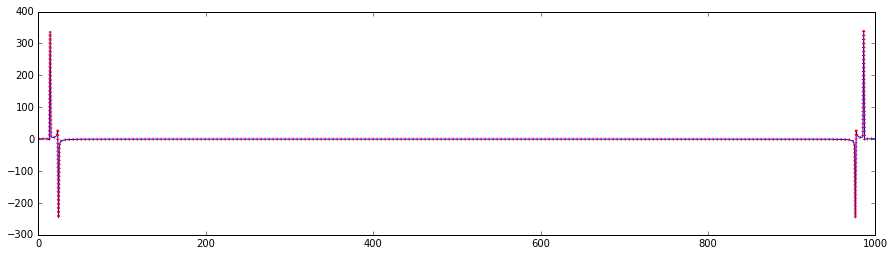

In [29]:
plt.figure(figsize=(15, 4))
plt.plot(dft.real)
#plt.plot(dft.imag)
plt.plot(npfft.real,':r', linewidth=3)

In [30]:
print(np.allclose(dft, npfft)) # 相同
abs(dft - npfft).mean() # 相同

True


3.2911559483240913e-12

In [31]:
npifft = np.fft.ifft(npfft)

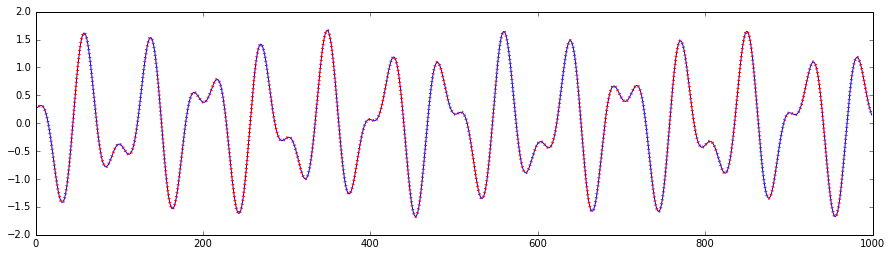

In [32]:
plt.figure(figsize=(15, 4))
#plt.plot(func, ':r', linewidth=3)
plt.plot(invdft.real)
plt.plot(npifft.real, ':r', linewidth=3)

In [33]:
print(np.allclose(npifft, invdft))
abs(npifft - invdft).mean() # 相同

True


1.799854783215491e-13

#### test DFT 矩陣乘法

In [34]:
# 先創造一個矩陣 是指數 '-2i*pi*k*n' k, n -> 0~N
size = 2000
mat = np.complex_(np.ones(shape=[size, size]))
for i_ in range(size):
    for j_ in range(size):
        mat[i_, j_] = -2j*np.pi*i_*j_

def DFT(arr): # 矩陣算法  siz = N
    global mat
    siz = arr.size
    matt = mat[0:siz, 0:siz]
    return np.dot(np.exp(matt/siz), arr)

In [35]:
func.size

1000

In [36]:
a = DFT(func)
b = Dis_Fourier_Transform_(func)
c = np.fft.fft(func)

In [37]:
print(np.allclose(a, b))
print(np.allclose(c, b))
print(np.allclose(a, c))

True
True
True


### 1D FFT

In [38]:
def get_fft(arr): # 取離散傅立葉轉換 獨立各頻率!! shape [n, n] 對角有值, 獨立每個在轉換回來 變成普通的正餘弦函數
    n = arr.size
    arrft = np.fft.fft(arr)
    eyeft = np.eye(n) * arrft        
    return eyeft

def get_ifft(eyeft): # 個頻率離散傅立葉逆轉換 變成分散波形 shape [n, n]
    eyeift = np.fft.ifft(eyeft)
    return eyeift

def fft_dict(arr): # 跑完上下兩階 (把'arr' 做離散傅立葉 shape[n, n], out[n]:第'n'筆 頻率'弦波')
    return get_ifft(get_fft(arr))

# 畫圖
def plt_func(func, figsize, func_name, ylim=None, color='b'):
    print(func_name)
    plt.figure(figsize=figsize)
    if ylim != None:
        plt.ylim(ylim)
    plt.plot(func, color)
    plt.show()

x:


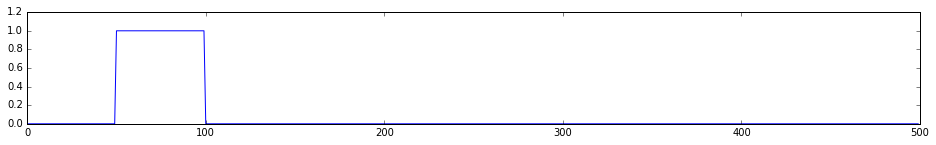

傅立葉頻譜:F(x)


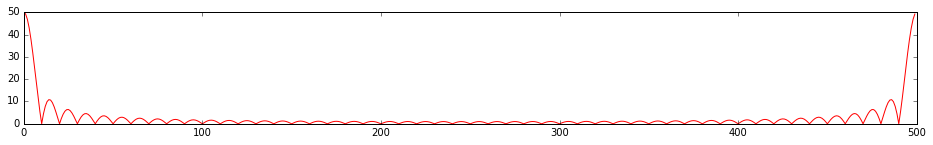

傅立葉頻譜平移:F(x)


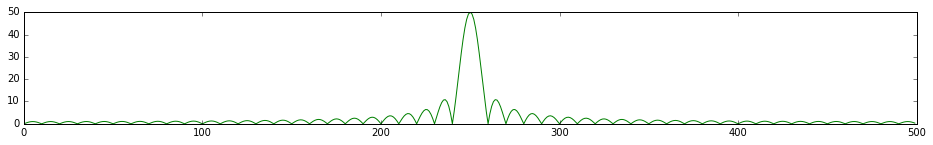

In [39]:
x = np.zeros(500)
n = x.size//2
x[50:50+50] = 1

fx = abs(np.fft.fft(x))
fx_roll = np.roll(fx, n) # np.roll()平移函式 x.size//2

plt_func(x, (16, 2), 'x:', ylim=(0, 1.2))
plt_func(fx, (16, 2), '傅立葉頻譜:F(x)', color='r')
plt_func(fx_roll, (16, 2), '傅立葉頻譜平移:F(x)', color='g')

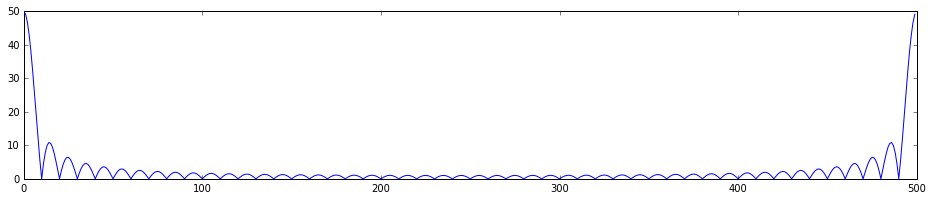

In [40]:
ffteye = get_fft(x) # 傅立葉頻譜函式
plt.figure(figsize=(16, 3))
#plt.plot(ffteye.sum(0).imag)
#plt.plot(ffteye.sum(0).real)
plt.plot(abs(ffteye.sum(0)))

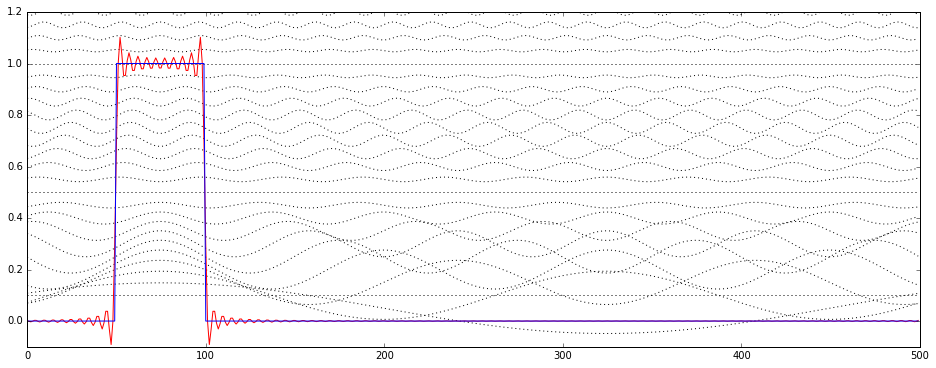

In [41]:
xeye = fft_dict(x) # 獨立出各個頻率函式
plt.figure(figsize=(16, 6))
plt.ylim(-0.1, 1.2)
s = 100
for i in range(s):
    plt.plot(xeye[i].real + 0.05*i, ':k')
plt.plot((xeye[1:s].sum(0).real * 2) + xeye[0].real.mean(), '-r')
#plt.plot(xeye[0].real, ':r')
#plt.plot(xeye[1:].sum(0).real, ':g')
plt.plot(abs(xeye.sum(0)), '-b')

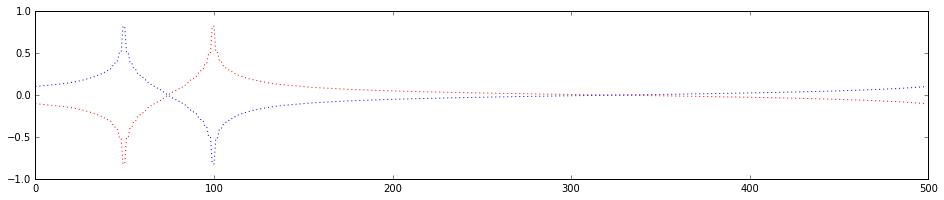

In [42]:
plt.figure(figsize=(16, 3)) # 轉換之虛部互相共厄!! 總和為 0
plt.plot((xeye[0:n].sum(0).imag), ':r')
plt.plot((xeye[n:].sum(0).imag), ':b')

In [43]:
(xeye[250+100].imag - xeye[250-100].imag).sum() # 共厄複數 幾乎相等!!

9.437056727497456e-33

x1 & x2:


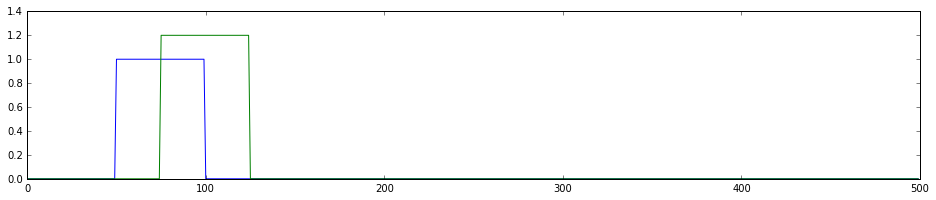

In [44]:
x1 = np.zeros(500)
x2 = np.zeros(500)
n = x1.size//2
x1[50:50+50], x2[75:75+50] = 1 ,1.2

print('x1 & x2:')
plt.figure(figsize=(16, 3))
plt.ylim(0, 1.4)
plt.plot(x1)
plt.plot(x2)
plt.show()

### Discrete cosine transform (離散餘弦變換)

https://en.wikipedia.org/wiki/Discrete_cosine_transform
https://zh.wikipedia.org/wiki/%E7%A6%BB%E6%95%A3%E4%BD%99%E5%BC%A6%E5%8F%98%E6%8D%A2

discrete cosine transform (DCT):
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/dce6d60796ea026a5a7564418d130effde90d9cf)

Inverse discrete cosine transform (IDCT):
![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/530977e36f3614f0a4f6e53564159b85f3f2763c)


In [45]:
# Discrete cosine transform
def Dis_Cos_(n ,k):
    return np.cos((n + 0.5) * k * np.pi / t.size)
# ???
def Dis_Cosine_Transform_(func):
    n = k = np.arange(func.size)
    return (func * Dis_Cos_(n ,k[:,np.newaxis])).sum(1)
# ??? 
def Inver_Dis_Cosine_Transform_(func):
    n = k = np.arange(func.size)
    return (func * Dis_Cos_(n[:,np.newaxis] ,k) / func.size).sum(1)

In [46]:
dct = Dis_Cosine_Transform_(func)
idct = Inver_Dis_Cosine_Transform_(dct)

func:


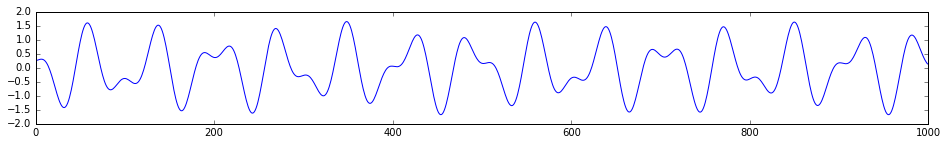

dct:


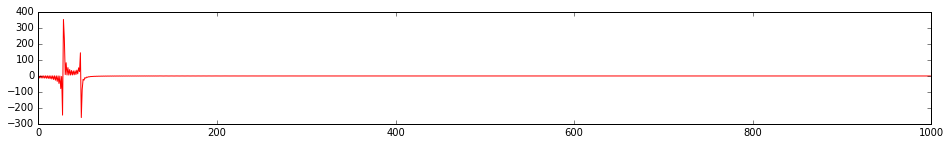

idct:


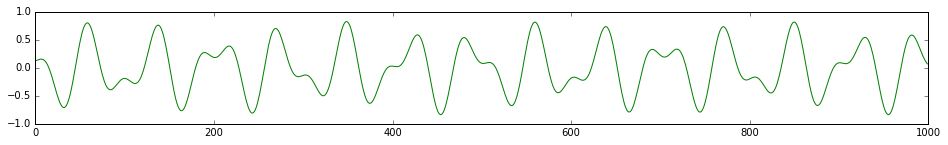

In [47]:
plt_func(func, (16, 2), 'func:', color='b')
plt_func(dct, (16, 2), 'dct:', color='r')
plt_func(idct, (16, 2), 'idct:', color='g')